The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


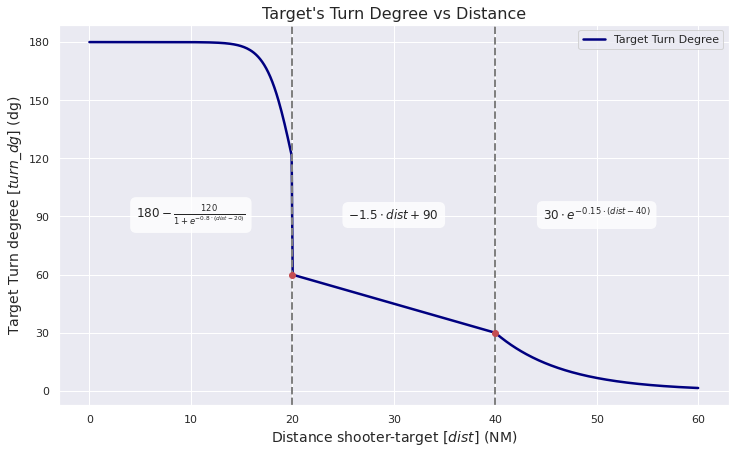

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the functions for the curve segments
def inverse_sigmoid(x):
    return 180 - 120 / (1 + np.exp(-0.8 * (x - 20)))

def corrected_linear(x):
    m = (30 - 60) / (40 - 20)
    b = 60 - m * 20
    return m * x + b

def exponential_decay(x):
    return 30 * np.exp(-0.15 * (x - 40))

# Define the piecewise function for the curve
def piecewise_function(x):
    if x < 20:
        return inverse_sigmoid(x)
    elif 20 <= x <= 40:
        return corrected_linear(x)
    else:
        return exponential_decay(x)

# Generate the x and y values
x_values = np.linspace(0, 60, 600)
y_values = np.array([piecewise_function(x) for x in x_values])

# Recalculate the y-values for the exact points of transition to ensure accuracy
y_at_20 = piecewise_function(20)
y_at_40 = piecewise_function(40)

# Set the seaborn theme
sns.set_theme()

# Define a function for centered annotations
def annotate_centered(ax, x_range, text):
    center_x = np.mean(x_range)
    ymin, ymax = ax.get_ylim()
    center_y = ymin + (ymax - ymin) / 2  # Adjust to place the annotation in the middle of the y-axis range
    ax.text(center_x, center_y, text, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='none', alpha=0.8))

# Create the plot with annotations and vertical dashed lines
plt.figure(figsize=(12, 7))
sns.lineplot(x=x_values, y=y_values, label='Target Turn Degree', color='navy', linewidth=2.5)
plt.xlabel('Distance shooter-target [$dist$] (NM)', fontsize=14)
plt.ylabel('Target Turn degree [$turn\_dg$] (dg)', fontsize=14)
plt.title("Target's Turn Degree vs Distance", fontsize=16)

# Adjust y-ticks to include specific values without cluttering
plt.yticks([0, 30, 60, 90, 120, 150, 180])

plt.grid(True)
plt.axvline(x=20, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=40, color='gray', linestyle='--', linewidth=2)

# Mark the connection points with red dots
plt.plot(20, y_at_20, 'ro')  # Connection point at x=20
plt.plot(40, y_at_40, 'ro')  # Connection point at x=40

# Adding annotations
annotate_centered(plt.gca(), [0, 20], r'$180 - \frac{120}{1 + e^{-0.8 \cdot (dist - 20)}}$')
annotate_centered(plt.gca(), [20, 40], r'$-1.5 \cdot dist + 90$')
annotate_centered(plt.gca(), [40, 60], r'$30 \cdot e^{-0.15 \cdot (dist - 40)}$')

# Save the figure with annotations in both PNG and EPS formats with 400 DPI
plt.savefig('target_turn_degree.png', dpi=400)
plt.savefig('target_turn_degree.eps', format='eps')

# Show the plot
plt.show()
